In [187]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [161]:
ruta_archivo = 'olist_order_payments_dataset.csv'
pagos = pd.read_csv(ruta_archivo, sep=',')
ruta_archivo2 = 'olist_orders_dataset.csv'
ordenes = pd.read_csv(ruta_archivo2, sep=',')
ruta_archivo3 = 'olist_customers_dataset.csv'
clientes = pd.read_csv(ruta_archivo3, sep=',')


In [163]:
ordenes['order_purchase_timestamp'] = pd.to_datetime(ordenes['order_purchase_timestamp'])


In [165]:
clientes_filtrados = clientes[['customer_id', 'customer_unique_id', "customer_city"]]


In [173]:
clientes_filtrados

,customer_id,customer_unique_id,customer_city
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas
...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,canoas


In [175]:
pagos_filtrados = pagos[['order_id', 'payment_value']]

In [179]:
# Realizamos el join
resultado = pagos_filtrados.merge(ordenes, on='order_id', how='inner')

# Opcional: visualizar las primeras filas del resultado
resultado


,order_id,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00
1,a9810da82917af2d9aefd1278f1dcfa0,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00
3,ba78997921bbcdc1373bb41e913ab953,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00
4,42fdf880ba16b47b59251dd489d4441a,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00
...,...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04 00:00:00
103882,7b905861d7c825891d6347454ea7863f,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12 00:00:00
103883,32609bbb3dd69b3c066a6860554a77bf,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaN,NaN,2017-12-05 00:00:00
103884,b8b61059626efa996a60be9bb9320e10,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24 00:00:00


In [181]:
resultado2 = resultado.merge(clientes_filtrados, on='customer_id', how='inner')

In [127]:
resultado2.head()

,order_id,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city
0,b81ef226f3fe1789b1e8b2acac839d17,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,teofilo otoni
1,a9810da82917af2d9aefd1278f1dcfa0,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,sao paulo
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,sao paulo
3,ba78997921bbcdc1373bb41e913ab953,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,juiz de fora
4,42fdf880ba16b47b59251dd489d4441a,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,4291db0da71914754618cd789aebcd56,conchas


In [183]:
# Asegúrate de que el DataFrame resultado2 tenga las siguientes columnas:
# 'customer_unique_id', 'payment_value', 'order_purchase_timestamp'

# Calcular AOV (Average Order Value) por cliente
aov = resultado2.groupby('customer_unique_id')['payment_value'].mean()

# Calcular la frecuencia de compra por cliente
purchase_frequency = resultado2.groupby('customer_unique_id').size()

# Calcular la tasa de retención (Retention Rate)
clientes_recurrentes = purchase_frequency[purchase_frequency > 1].index
retention_rate = purchase_frequency.apply(lambda x: 1 if x > 1 else 0)

# Calcular la esperanza de vida del cliente (Customer Lifespan)
clientes_lifespan = (
    resultado2.groupby('customer_unique_id')['order_purchase_timestamp'].max() - 
    resultado2.groupby('customer_unique_id')['order_purchase_timestamp'].min()
).dt.days / 365
customer_lifespan = clientes_lifespan.fillna(0)

# Unir los cálculos al DataFrame
clv_df = pd.DataFrame({
    'AOV': aov,
    'Purchase Frequency': purchase_frequency,
    'Retention Rate': retention_rate,
    'Customer Lifespan': customer_lifespan
}).reset_index()

# Calcular el CLV individual
clv_df['CLV'] = (
    clv_df['AOV'] * 
    clv_df['Purchase Frequency'] * 
    clv_df['Retention Rate'] * 
    clv_df['Customer Lifespan']
)

# Opcional: unir los valores de CLV al DataFrame original
datos = resultado2.merge(clv_df[['customer_unique_id', 'CLV']], on='customer_unique_id', how='left')

# Visualizar los datos con CLV calculado
datos

                           order_id  payment_value  \
0  b81ef226f3fe1789b1e8b2acac839d17          99.33   
1  a9810da82917af2d9aefd1278f1dcfa0          24.39   
2  25e8ea4e93396b6fa0d3dd708e76c1bd          65.71   
3  ba78997921bbcdc1373bb41e913ab953         107.78   
4  42fdf880ba16b47b59251dd489d4441a         128.45   

                        customer_id order_status order_purchase_timestamp  \
0  0a8556ac6be836b46b3e89920d59291c    delivered      2018-04-25 22:01:49   
1  f2c7fc58a9de810828715166c672f10a    delivered      2018-06-26 11:01:38   
2  25b14b69de0b6e184ae6fe2755e478f9    delivered      2017-12-12 11:19:55   
3  7a5d8efaaa1081f800628c30d2b0728f    delivered      2017-12-06 12:04:06   
4  15fd6fb8f8312dbb4674e4518d6fa3b3    delivered      2018-05-21 13:59:17   

     order_approved_at order_delivered_carrier_date  \
0  2018-04-25 22:15:09          2018-05-02 15:20:00   
1  2018-06-26 11:18:58          2018-06-28 14:18:00   
2  2017-12-14 09:52:34          2017-12-15 20:1

In [185]:
datos

,order_id,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,CLV
0,b81ef226f3fe1789b1e8b2acac839d17,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,teofilo otoni,0.000000
1,a9810da82917af2d9aefd1278f1dcfa0,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,sao paulo,0.000000
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,sao paulo,0.000000
3,ba78997921bbcdc1373bb41e913ab953,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,juiz de fora,0.000000
4,42fdf880ba16b47b59251dd489d4441a,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,4291db0da71914754618cd789aebcd56,conchas,122.108329
...,...,...,...,...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04 00:00:00,b6027ac07fb76ebca8c97b1887865aee,atibaia,0.000000
103882,7b905861d7c825891d6347454ea7863f,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12 00:00:00,53b30ca78efb2b7efcd3f9e461587eb2,belo horizonte,17.287315
103883,32609bbb3dd69b3c066a6860554a77bf,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaN,NaN,2017-12-05 00:00:00,d3c7da954a324253814096bcaf240e4e,sao paulo,0.000000
103884,b8b61059626efa996a60be9bb9320e10,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24 00:00:00,b84dc68f02f122a88d7e7bbd37b06204,rio de janeiro,0.000000


C:\Users\nicoe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nicoe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nicoe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nicoe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nicoe\anaconda3\Lib\site-packages\sklearn\clust

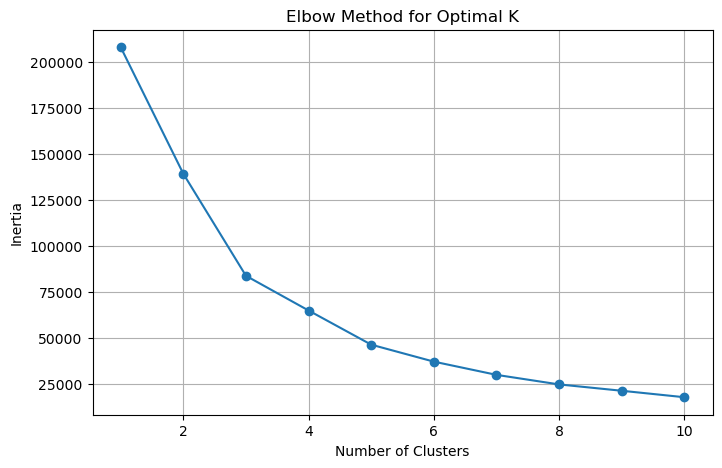

In [189]:
# Selecting the relevant features for clustering
X = datos[['payment_value', 'CLV']]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

C:\Users\nicoe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


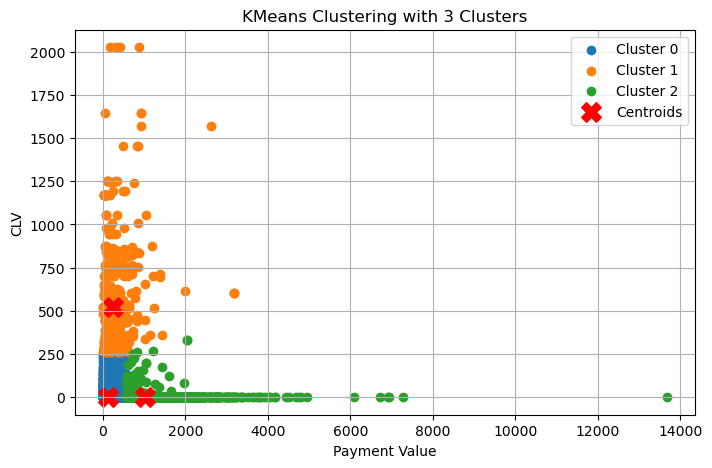

In [199]:
# Applying KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
datos['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(8, 5))
for cluster in range(3):
    cluster_data = datos[datos['cluster'] == cluster]
    plt.scatter(cluster_data['payment_value'], cluster_data['CLV'], label=f'Cluster {cluster}')

# Cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.xlabel('Payment Value')
plt.ylabel('CLV')
plt.title('KMeans Clustering with 3 Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [203]:
import pandas as pd
import numpy as np

# Asegúrate de que el DataFrame datos tenga las siguientes columnas:
# 'customer_unique_id', 'payment_value', 'order_purchase_timestamp'

# 1. Calcular Recency (días desde la última compra)
fecha_referencia = datos['order_purchase_timestamp'].max()
rfm = datos.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (fecha_referencia - x.max()).days,
    'customer_unique_id': 'size',  # Frecuencia
    'payment_value': 'sum'         # Monetario
}).rename(columns={
    'order_purchase_timestamp': 'Recency',
    'customer_unique_id': 'Frequency',
    'payment_value': 'Monetary'
})

# Asignar puntajes a R, F y M con manejo de duplicados
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4], duplicates='drop')
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')

# 3. Crear una puntuación RFM combinada
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# 4. (Opcional) Segmentar clientes según RFM
def segmentar_cliente(rfm_score):
    if rfm_score >= '444': return 'Mejores Clientes'
    elif rfm_score >= '344': return 'Clientes Potenciales'
    elif rfm_score >= '244': return 'Necesitan Atención'
    else: return 'Clientes en Riesgo'

rfm['Segment'] = rfm['RFM_Score'].apply(segmentar_cliente)

# 5. Revisar el resultado
print(rfm.head())

ValueError: Bin labels must be one fewer than the number of bin edges

In [205]:
# Asegúrate de que el DataFrame datos tenga las siguientes columnas:
# 'customer_unique_id', 'payment_value', 'order_purchase_timestamp'

# 1. Calcular Recency (días desde la última compra)
fecha_referencia = datos['order_purchase_timestamp'].max()
rfm = datos.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (fecha_referencia - x.max()).days,
    'customer_unique_id': 'size',  # Frecuencia
    'payment_value': 'sum'         # Monetario
}).rename(columns={
    'order_purchase_timestamp': 'Recency',
    'customer_unique_id': 'Frequency',
    'payment_value': 'Monetary'
})


In [215]:
rfm['R_Score'] = pd.cut(rfm['Recency'], bins=4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.cut(rfm['Monetary'], bins=4, labels=[1, 2, 3, 4])


# Verificar resultados únicos
print(rfm[['Recency', 'Frequency', 'Monetary']].nunique())


Recency        629
Frequency       23
Monetary     28828
dtype: int64


In [217]:
# 3. Crear una puntuación RFM combinada
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [219]:
# 4. (Opcional) Segmentar clientes según RFM
def segmentar_cliente(rfm_score):
    if rfm_score >= '444': return 'Mejores Clientes'
    elif rfm_score >= '344': return 'Clientes Potenciales'
    elif rfm_score >= '244': return 'Necesitan Atención'
    else: return 'Clientes en Riesgo'

In [221]:
rfm['Segment'] = rfm['RFM_Score'].apply(segmentar_cliente)

# 5. Revisar el resultado
print(rfm.head())

                                  Recency  Frequency  Monetary R_Score  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2      160          1    141.90       4   
0000b849f77a49e4a4ce2b2a4ca5be3f      163          1     27.19       4   
0000f46a3911fa3c0805444483337064      585          1     86.22       1   
0000f6ccb0745a6a4b88665a16c9f078      369          1     43.62       3   
0004aac84e0df4da2b147fca70cf8255      336          1    196.89       3   

                                 F_Score M_Score RFM_Score  \
customer_unique_id                                           
0000366f3b9a7992bf8c76cfdf3221e2       1       1       411   
0000b849f77a49e4a4ce2b2a4ca5be3f       1       1       411   
0000f46a3911fa3c0805444483337064       1       1       111   
0000f6ccb0745a6a4b88665a16c9f078       1       1       311   
0004aac84e0df4da2b147fca70cf8255       1       1       311   

                                              

In [239]:
rfm.reset_index(inplace=True)
rfm

,customer_unique_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,4,1,1,411,Clientes Potenciales
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,4,1,1,411,Clientes Potenciales
2,0000f46a3911fa3c0805444483337064,585,1,86.22,1,1,1,111,Clientes en Riesgo
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,3,1,1,311,Necesitan Atención
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,3,1,1,311,Necesitan Atención
...,...,...,...,...,...,...,...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,495,1,2067.42,2,1,1,211,Clientes en Riesgo
96091,fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58,3,1,1,311,Necesitan Atención
96092,ffff371b4d645b6ecea244b27531430a,617,1,112.46,1,1,1,111,Clientes en Riesgo
96093,ffff5962728ec6157033ef9805bacc48,168,1,133.69,4,1,1,411,Clientes Potenciales


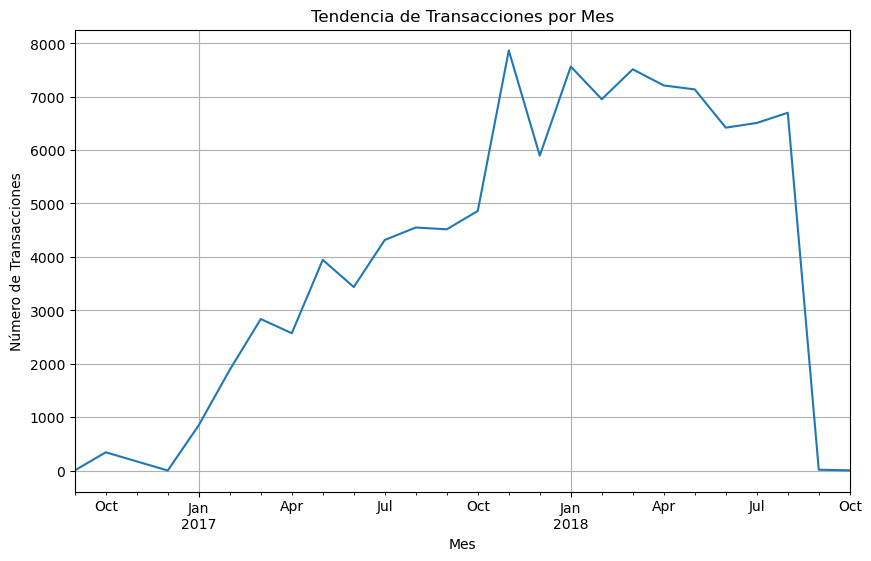

In [225]:
# Convertir la fecha de compra a formato datetime
datos['order_purchase_timestamp'] = pd.to_datetime(datos['order_purchase_timestamp'])

# Agrupar por mes y contar transacciones
transacciones_por_mes = datos.groupby(datos['order_purchase_timestamp'].dt.to_period('M')).size()

# Graficar tendencia de transacciones
transacciones_por_mes.plot(kind='line', figsize=(10, 6), title='Tendencia de Transacciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Transacciones')
plt.grid()
plt.show()

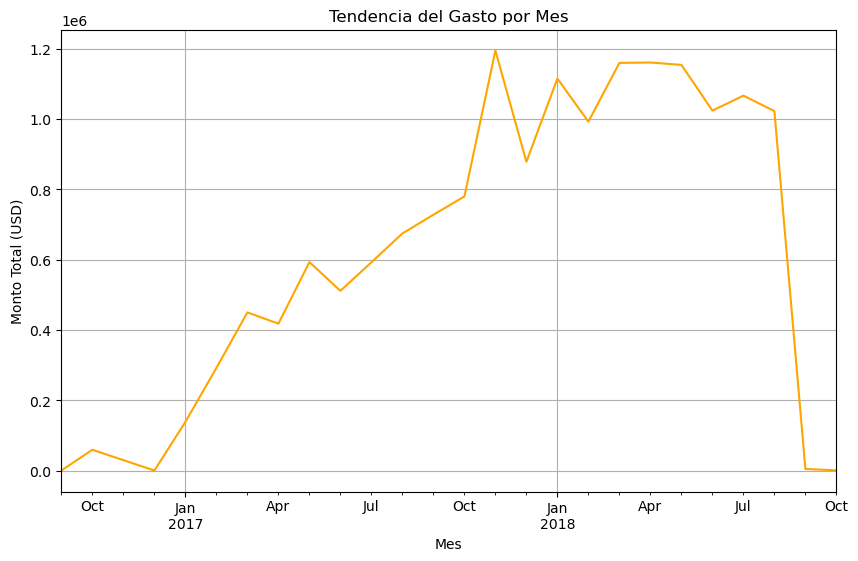

In [227]:
# Agrupar por mes y sumar el valor monetario
gasto_por_mes = datos.groupby(datos['order_purchase_timestamp'].dt.to_period('M'))['payment_value'].sum()

# Graficar tendencia de gasto
gasto_por_mes.plot(kind='line', figsize=(10, 6), title='Tendencia del Gasto por Mes', color='orange')
plt.xlabel('Mes')
plt.ylabel('Monto Total (USD)')
plt.grid()
plt.show()

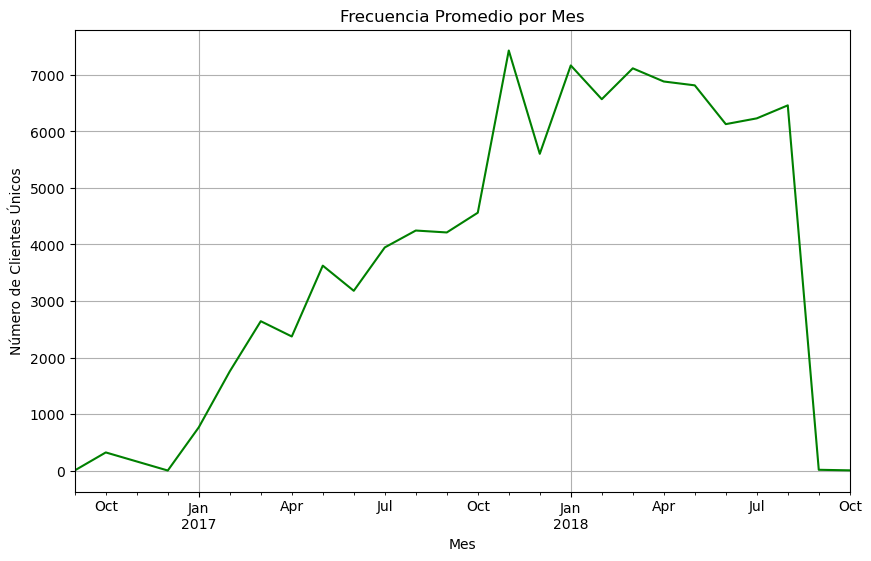

In [231]:
# Agrupar por cliente y calcular la frecuencia promedio por mes
frecuencia_promedio = datos.groupby(datos['order_purchase_timestamp'].dt.to_period('M'))['customer_unique_id'].nunique()

# Graficar tendencia de frecuencia
frecuencia_promedio.plot(kind='line', figsize=(10, 6), title='Frecuencia Promedio por Mes', color='green')
plt.xlabel('Mes')
plt.ylabel('Número de Clientes Únicos')
plt.grid()
plt.show()

In [245]:
final = datos.merge(rfm, on="customer_unique_id", how='inner')

In [249]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103886 non-null  object        
 1   payment_value                  103886 non-null  float64       
 2   customer_id                    103886 non-null  object        
 3   order_status                   103886 non-null  object        
 4   order_purchase_timestamp       103886 non-null  datetime64[ns]
 5   order_approved_at              103711 non-null  object        
 6   order_delivered_carrier_date   101998 non-null  object        
 7   order_delivered_customer_date  100754 non-null  object        
 8   order_estimated_delivery_date  103886 non-null  object        
 9   customer_unique_id             103886 non-null  object        
 10  customer_city                  103886 non-null  object        
 11  

In [251]:

# Especifica el nombre del archivo y guarda el DataFrame
file_name = 'final_database.xlsx'
final.to_excel(file_name, index=False, engine='openpyxl')  # Usa el motor 'openpyxl'

